In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import sys
sys.path.insert(1, '../utils/')
import src_utils
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import scipy
from numpy.random import shuffle


# 1. Set rcParams

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams['axes.linewidth'] = 0.5

plt.rcParams["figure.dpi"] = 300

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

# 2. Set up grid

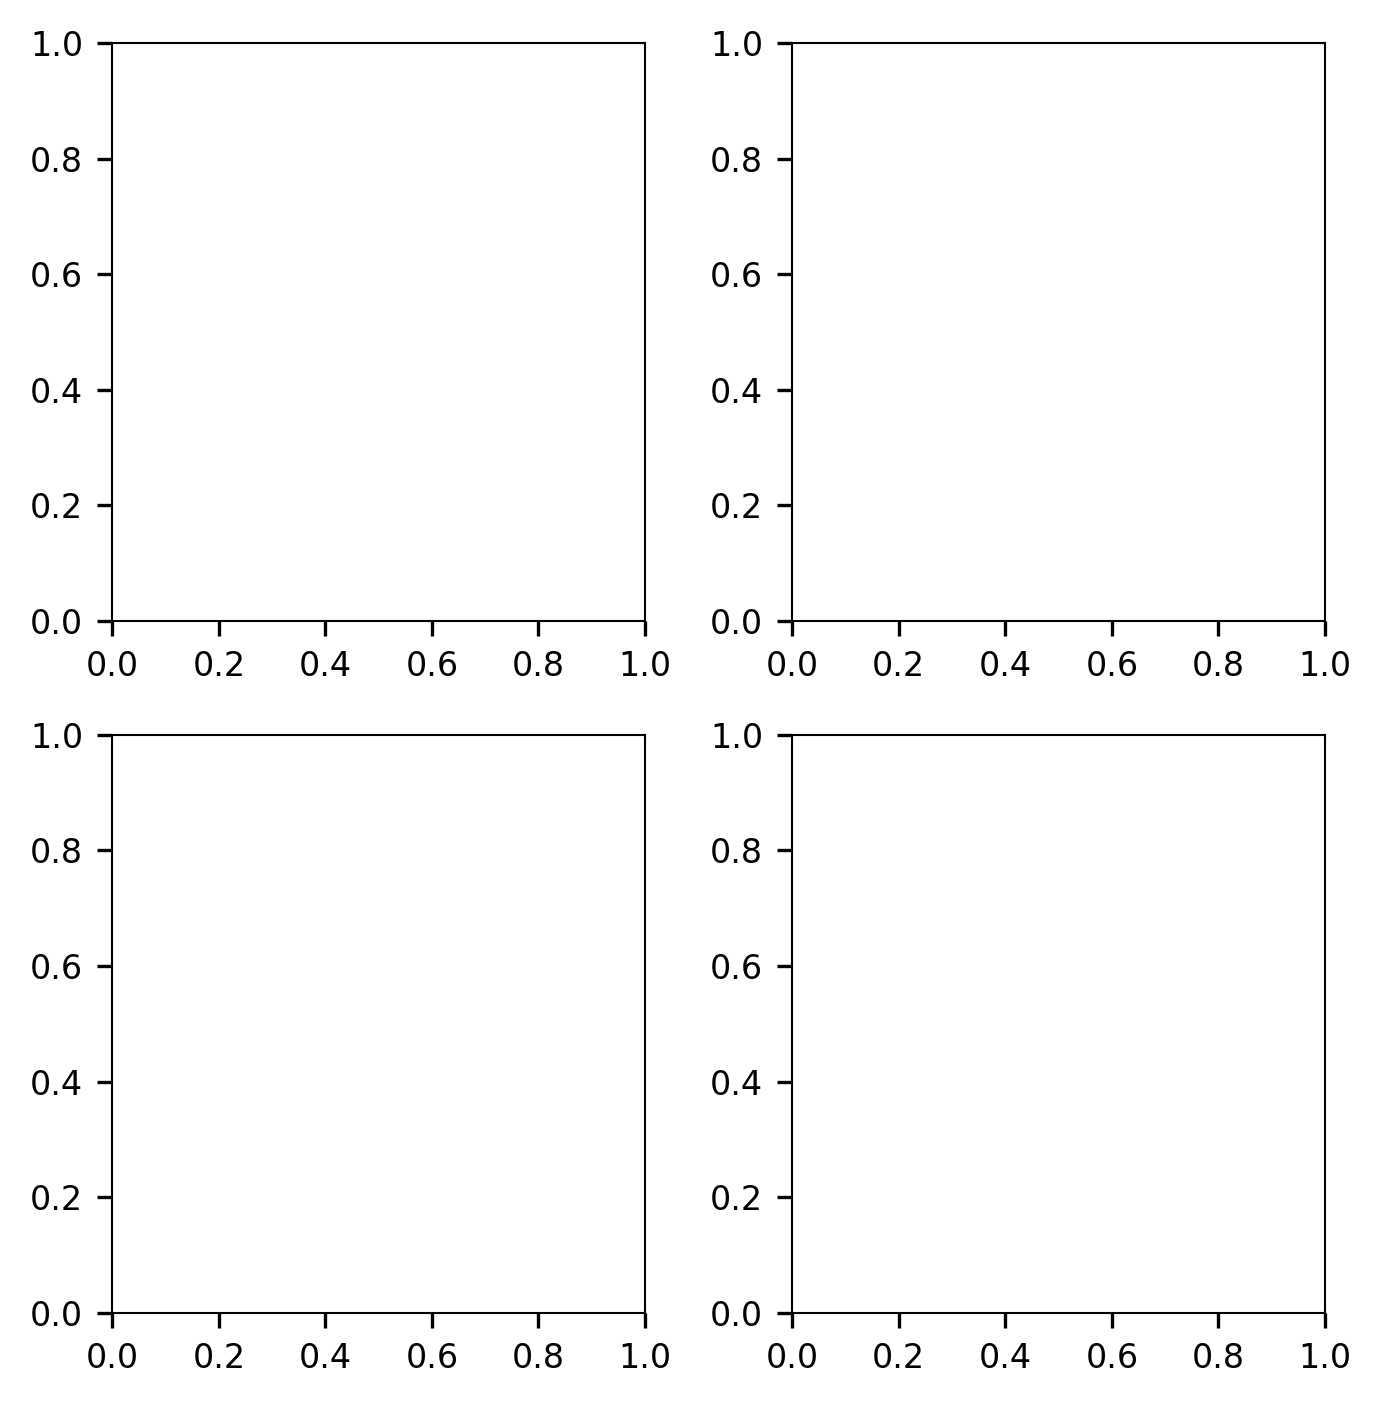

In [3]:
width = 114 / 25.4
height = 116 / 25.4
fig4 = plt.figure(constrained_layout=True, figsize=(width, height))
gs1 = fig4.add_gridspec(2, 2, left=0.16, right=0.95)

f4_ax1 = fig4.add_subplot(gs1[0, 0])
f4_ax2 = fig4.add_subplot(gs1[0, 1])
f4_ax3 = fig4.add_subplot(gs1[1, 0])
f4_ax4 = fig4.add_subplot(gs1[1, 1])


# Read in necessary data

In [4]:
# Read in diffsel, dmso, and synon data

diffsel_df = pd.read_csv('../utils/diffsel_calib.csv', index_col=0)
positions = [np.nan, np.nan]
for mut in diffsel_df.index.tolist()[2:]:
    position = int(mut[1:-1])
    positions.append(position)
diffsel_df['position'] = positions

dmso_df = pd.read_csv('../utils/point_muts_calib.csv', index_col=0, header=[0,1])
dmso_df.rename(dict(zip(dmso_df.index.tolist(), diffsel_df.index.tolist())), inplace=True)

synon_zero_df = pd.read_csv('../utils/synon_df.csv', index_col=0, header=[0,1])

synon_diffsel = np.genfromtxt('../utils/synon_diffsel_calib.txt', delimiter=',')

In [5]:
# Define cutoffs for GOF activity and strong client

dmso_cutoff = np.nanmean(synon_zero_df.values) + 1.3 * np.nanstd(synon_zero_df.values)
diffsel_cutoff = np.nanmean(synon_diffsel) - 2 * np.nanstd(synon_diffsel)

In [6]:
def get_interface_client_scores(interface_pos, diffsel_df):
    client_scores = []
    for pos in interface_pos:
        idx = diffsel_df['position'] == pos
        scores = diffsel_df[idx]['diffsel'].values.tolist()
        client_scores = client_scores + scores
    return(client_scores)

fsize=6

af_pocket_pos = [378, 381, 443, 444, 506, 508, 511, 512]
b1b2_pos = [273, 274, 275, 283, 285, 286]
sh2_pos = [325, 368, 375]
sh3_pos = [289, 290, 291, 293]

synon_diffsel = np.genfromtxt('../utils/synon_diffsel_calib.txt', delimiter=',')
diffsel_cutoff = np.nanmean(synon_diffsel) - 2 * np.nanstd(synon_diffsel)
diffsel_other_cutoff = np.nanmean(synon_diffsel) + 2 * np.nanstd(synon_diffsel)

af_pocket_scores = get_interface_client_scores(af_pocket_pos, diffsel_df)
b1b2_scores = get_interface_client_scores(b1b2_pos, diffsel_df)
sh2_scores = get_interface_client_scores(sh2_pos, diffsel_df)
sh3_scores = get_interface_client_scores(sh3_pos, diffsel_df)
y = (
    ['af_pocket'] * len(af_pocket_scores) + 
    ['b1b2_strands'] * len(b1b2_scores) +
    ['sh2_interface'] * len(sh2_scores) +
    ['sh3_interface'] * len(sh3_scores)
)
x = af_pocket_scores + b1b2_scores + sh2_scores + sh3_scores

ax = f4_ax1
ax.axvline(diffsel_cutoff, linestyle='-', c='lightgrey')
#ax.axvline(diffsel_other_cutoff, linestyle='--', c='lightgrey')

palette = ['#6bd581', '#14c7de', '#e26a6a', '#f1c40f']
#sns.violinplot(x=x, y=y, palette=palette, ax=ax)
sns.swarmplot(x, y, ax=ax, palette=palette, size=2)


#ax.set_yticks(np.arange(4))
ax.set_yticks([])
#ax.set_yticklabels([r'$\alpha$F pocket', r'$\beta 1 - \beta 2$ strands', 'SH2-CD interface', 'SH3-CD interface'])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.annotate(r'$\alpha$F pocket', (xmin + 0.05, ymax + 0.4), fontsize=fsize)
ax.annotate(r'$\beta 1 - \beta 2$ strands', (xmin + 0.05, ymax + 1.4), fontsize=fsize)
ax.annotate('SH2-CD interface', (xmin + 0.05, ymax + 2.4), fontsize=fsize)
ax.annotate('SH3-CD interface', (xmin + 0.05, ymax + 3.4), fontsize=fsize)

ax.set_xlabel('Client score')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

In [7]:
def get_interface_activity_scores(interface_pos, diffsel_df, dmso_df):
    activity_scores = []
    for pos in interface_pos:
        idx = diffsel_df['position'] == pos
        scores = dmso_df[idx][('Zero', 'score')].values.tolist()
        activity_scores = activity_scores + scores
    return(activity_scores)

"""af_pocket_pos = [378, 381, 443, 444, 506, 508, 511, 512]
b1b2_pos = [273, 274, 275, 283, 285, 286]
sh2_pos = [325, 368, 375]
sh3_pos = [289, 290, 291, 293]"""

# Get activity scores for each interface
ax = f4_ax2
#fsize=6

af_pocket_scores = get_interface_activity_scores(af_pocket_pos, diffsel_df, dmso_df)
b1b2_scores = get_interface_activity_scores(b1b2_pos, diffsel_df, dmso_df)
sh2_scores = get_interface_activity_scores(sh2_pos, diffsel_df, dmso_df)
sh3_scores = get_interface_activity_scores(sh3_pos, diffsel_df, dmso_df)
y = (
    ['af_pocket'] * len(af_pocket_scores) + 
    ['b1b2_strands'] * len(b1b2_scores) +
    ['sh2_interface'] * len(sh2_scores) +
    ['sh3_interface'] * len(sh3_scores)
)
x = af_pocket_scores + b1b2_scores + sh2_scores + sh3_scores

#ax.axvline(diffsel_cutoff, linestyle='--', c='lightgrey')
#ax.axvline(diffsel_other_cutoff, linestyle='--', c='lightgrey')

#palette = ['#b3b3b3', '#14c7de', '#e26a6a', '#f1c40f']
#sns.violinplot(x=x, y=y, palette=palette, ax=ax, inner=None, alpha=0.15)
sns.swarmplot(x, y, ax=ax, palette=palette, size=2)



#ax.set_yticks(np.arange(4))
ax.set_yticks([])
#ax.set_yticklabels([r'$\alpha$F pocket', r'$\beta 1 - \beta 2$ strands', 'SH2-CD interface', 'SH3-CD interface'])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.axvline(dmso_cutoff, linestyle='--', c='lightgrey')
ax.annotate(r'$\alpha$F pocket', (xmin + 0.05, ymax + 0.4), fontsize=fsize)
ax.annotate(r'$\beta 1 - \beta 2$ strands', (xmin + 0.05, ymax + 1.4), fontsize=fsize)
ax.annotate('SH2-CD', (xmin + 0.05, ymax + 2.4), fontsize=fsize)
ax.annotate('SH3-CD', (xmin + 0.05, ymax + 3.4), fontsize=fsize)

ax.set_xlabel('Activity score')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.set_title(r'$\alpha > \beta$')
#plt.xlabel('Client score')

In [8]:
ax = f4_ax3

# Plot
client_mask = (diffsel_df['diffsel'] < diffsel_cutoff).values
ax.scatter(dmso_df[('Zero', 'score')][~client_mask], diffsel_df['diffsel'][~client_mask], alpha=0.5, color='#b3b3b3', label='Non/weak client')
ax.scatter(dmso_df[('Zero', 'score')][client_mask], diffsel_df['diffsel'][client_mask], alpha=0.5, color='#b3b3b3', label='Strong client')
ax.set_ylabel('Client score')
ax.set_xlabel('Activity score')
ax.axhline(diffsel_cutoff, c='lightgrey')
ax.axvline(dmso_cutoff, linestyle='--', c='lightgrey')
#ax.legend()

# Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# R^2 value
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(dmso_df[('Zero', 'score')], diffsel_df['diffsel'])
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
ax.annotate('$r$={0:.2f}'.format(r_value), (xmin + 0.05, ymax - 0.1))

# GOF line
#ax.axvline(dmso_cutoff, linestyle='--', c='k')

Text(-2.3808992988469986, 2.743136674162123, '$r$=-0.91')

In [9]:
# Plot activity vs DMSO but by hotspots
#palette = ['silver', 'limegreen', 'salmon', 'gold']
ax = f4_ax4
# Get activity scores for each interface
af_pocket_activity_scores = get_interface_activity_scores(af_pocket_pos, diffsel_df, dmso_df)
b1b2_activity_scores = get_interface_activity_scores(b1b2_pos, diffsel_df, dmso_df)

# Get client scores for each interface
af_pocket_scores = get_interface_client_scores(af_pocket_pos, diffsel_df)
b1b2_scores = get_interface_client_scores(b1b2_pos, diffsel_df)

alpha_val = 0.5
ax.scatter(af_pocket_activity_scores, af_pocket_scores, c=palette[0], label=r'$\alpha$F pocket', alpha=alpha_val)
fn = np.poly1d(np.polyfit(af_pocket_activity_scores, af_pocket_scores,1))
ax.plot(af_pocket_activity_scores, fn(af_pocket_activity_scores), c=palette[0])

ax.scatter(b1b2_activity_scores, b1b2_scores, c=palette[1], label=r'$\beta 1 - \beta 2$ strands', alpha=alpha_val)
fn = np.poly1d(np.polyfit(b1b2_activity_scores, b1b2_scores, 1))
ax.plot(b1b2_activity_scores, fn(b1b2_activity_scores), c=palette[1])

ax.axhline(diffsel_cutoff, linestyle='-', c='lightgrey')
ax.axvline(dmso_cutoff, linestyle='--', c='lightgrey')
ax.legend(fontsize=6)
ax.set_xlabel('Activity score')
ax.set_ylabel('Client score')
#plt.show()

# Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

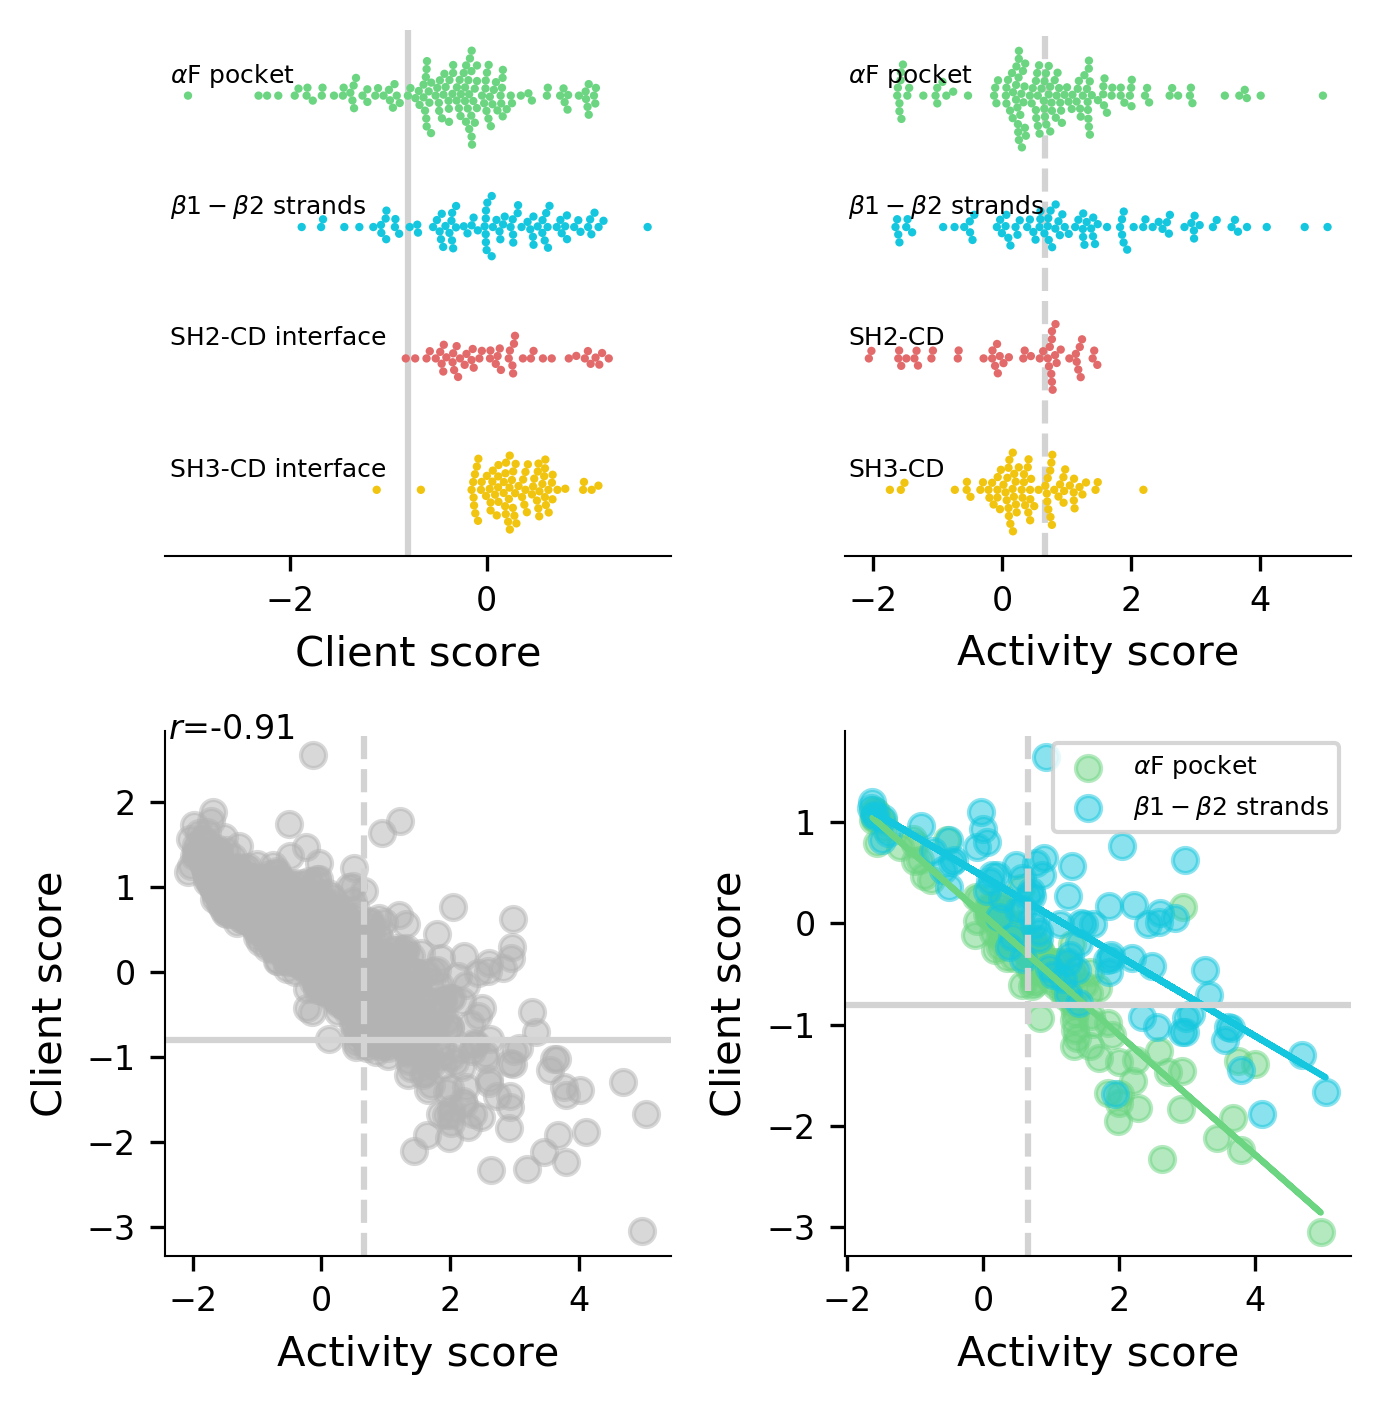

In [10]:
fig4

In [11]:
falpha = np.poly1d(np.polyfit(af_pocket_activity_scores, af_pocket_scores,1))
fbeta = np.poly1d(np.polyfit(b1b2_activity_scores, b1b2_scores, 1))


In [12]:
falpha

poly1d([-0.59051421,  0.08207842])

In [13]:
fbeta

poly1d([-0.39360497,  0.46447763])

In [14]:
gradient1, intercept1, r_value1, p_value1, std_err1 = scipy.stats.linregress(af_pocket_activity_scores, af_pocket_scores)
gradient2, intercept2, r_value2, p_value2, std_err2 = scipy.stats.linregress(b1b2_activity_scores, b1b2_scores)

z = (gradient1 - gradient2) / np.sqrt((std_err1**2) + (std_err2**2))
scipy.stats.t.sf(abs(z), df=86)*2

1.6196570122358483e-06

In [15]:
fig4.savefig('f5.png')